In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/TUBES/sentimen.csv')
df.head()

,text,Cleaning,HapusEmoji,3/Lebih,CaseFolding,Tokenizing,Formalisasi,Stopword Removal,Stemming,Clean,Score,Label
0,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,anies mengatakan ini utk mengkritik kebijakan ...,"['anies', 'mengatakan', 'ini', 'utk', 'mengkri...","['anies', 'mengatakan', 'ini', 'untuk', 'mengk...","['anies', 'mengkritik', 'kebijakan', 'bantuan ...","['anies', 'kritik', 'bijak', 'bantu dari perin...",anies kritik bijak bantu dari perintah mobil l...,-11,Negative
1,"Pakai Mobil Listrik, PLN Buktikan Penghematan ...",Pakai Mobil Listrik PLN Buktikan Penghematan ...,Pakai Mobil Listrik PLN Buktikan Penghematan ...,Pakai Mobil Listrik PLN Buktikan Penghematan ...,pakai mobil listrik pln buktikan penghematan ...,"['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'bukti', ...",pakai mobil listrik pln bukti hemat persen rut...,0,Neutral
2,"*Gunakan Mobil Listrik, ternyata 85 Persen Leb...",*Gunakan Mobil Listrik ternyata Persen Lebi...,*Gunakan Mobil Listrik ternyata Persen Lebi...,*Gunakan Mobil Listrik ternyata Persen Lebih ...,*gunakan mobil listrik ternyata persen lebih ...,"['*', 'gunakan', 'mobil', 'listrik', 'ternyata...","['*', 'gunakan', 'mobil', 'listrik', 'ternyata...","['*', 'mobil', 'listrik', 'persen', 'hemat', '...","['', 'mobil', 'listrik', 'persen', 'hemat', 'l...",mobil listrik persen hemat lho electrizen sa...,5,Positive
3,"Polusi itu maslah di slrh Kota besar dunia, du...",Polusi itu maslah di slrh Kota besar dunia du...,Polusi itu maslah di slrh Kota besar dunia du...,Polusi itu maslah di slrh Kota besar dunia du...,polusi itu maslah di slrh kota besar dunia du...,"['polusi', 'itu', 'maslah', 'di', 'slrh', 'kot...","['polusi', 'itu', 'masalah', 'di', 'seluruh', ...","['polusi', 'kota', 'dunia', 'duniapun', 'menga...","['polusi', 'kota', 'dunia', 'dunia', 'atas', '...",polusi kota dunia dunia atas polusi udara tutu...,-24,Negative
4,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,sedangkan carbon capture dan storage mmg harus...,"['sedangkan', 'carbon', 'capture', 'dan', 'sto...","['sedangkan', 'carbon', 'capture', 'dan', 'sto...","['carbon', 'capture', 'storage', 'topik', 'hot...","['carbon', 'capture', 'storage', 'topik', 'hot...",carbon capture storage topik hot kait polusi u...,-11,Negative


<Axes: xlabel='count', ylabel='Label'>

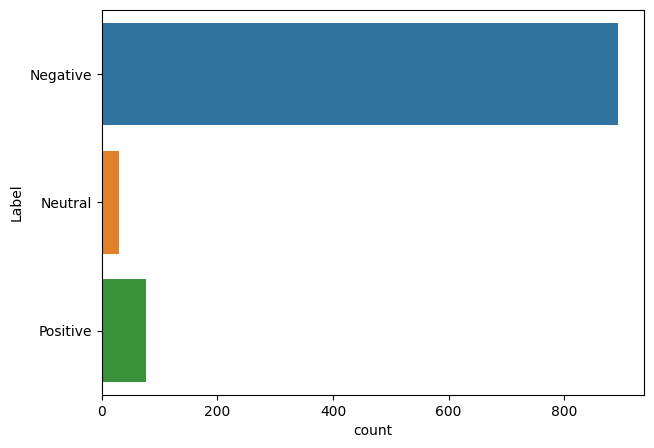

In [ ]:
f, ax = plt.subplots(figsize=(7,5))
sns.countplot(y=df['Label'], data=df)

<Axes: >

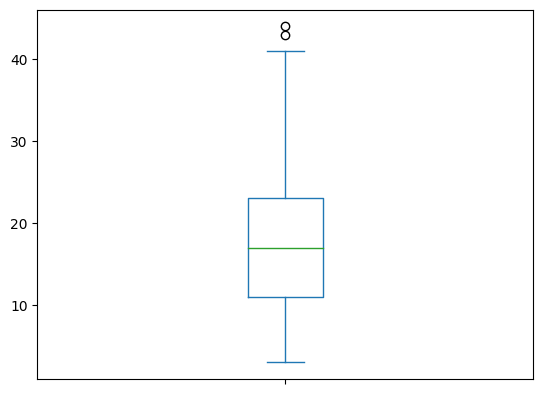

In [ ]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['Clean']])

tweet_len.plot(kind='box')

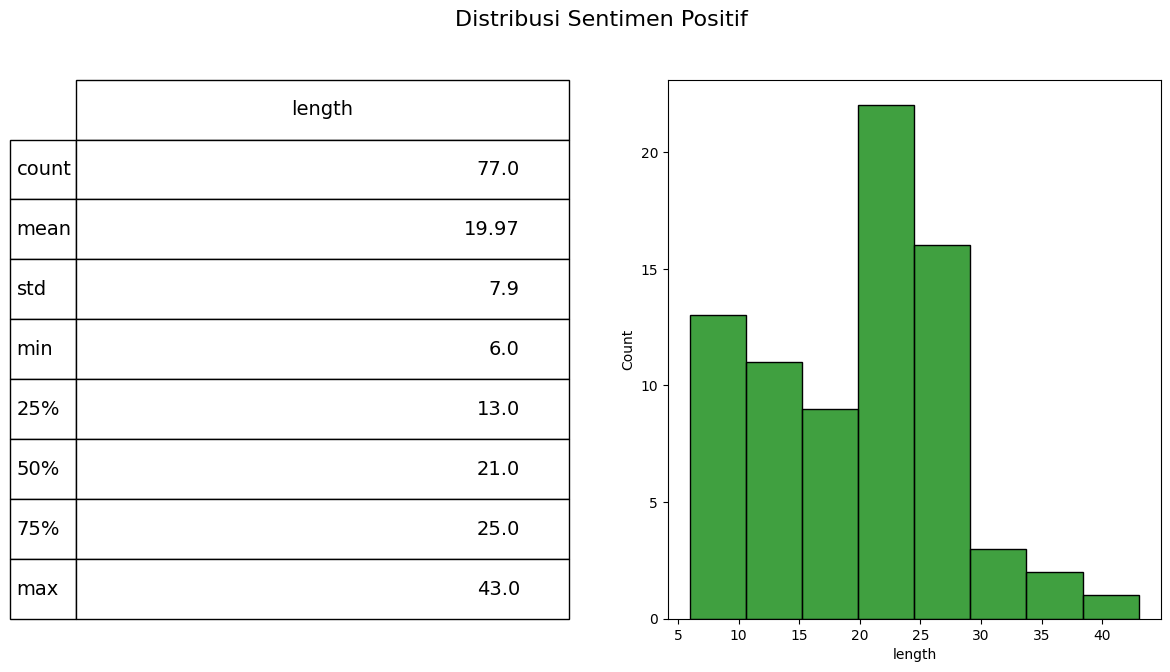

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Clean.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Label']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.Label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi Sentimen Positif', fontsize=16)

plt.show()

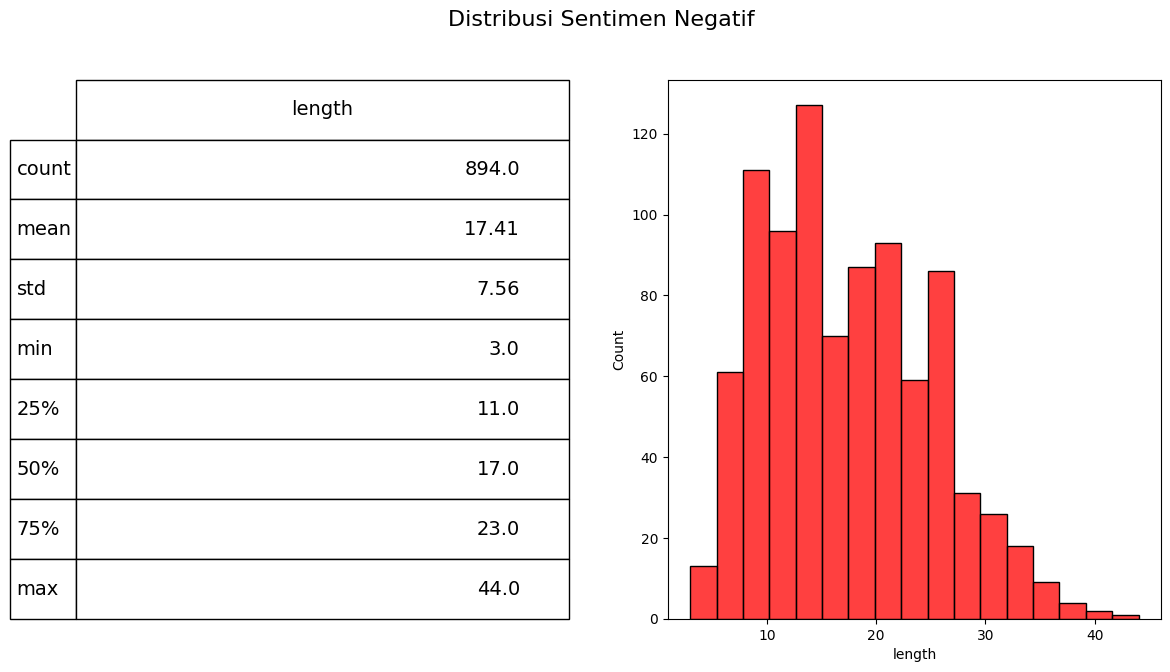

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Clean.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Label']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.Label=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi Sentimen Negatif', fontsize=16)

plt.show()

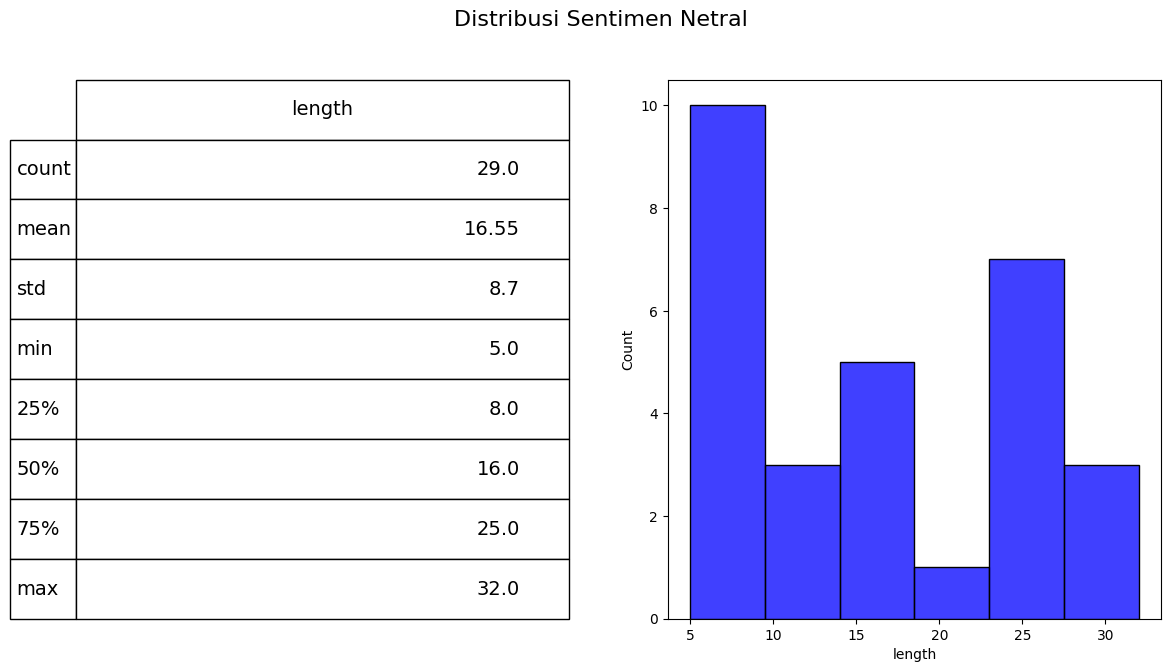

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Clean.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Label']=='Neutral']['length'], ax=ax1,color='blue')
describe = df.length[df.Label=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribusi Sentimen Netral', fontsize=16)

plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='Label', title ='Diagram Lingkaran Sentimen Analisis')
fig.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, Label):
    combined_tweets = " ".join([tweet for tweet in df[df.Label==Label]['Clean']])

    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(Label), fontsize=20)
    plt.axis('off')
    plt.show()

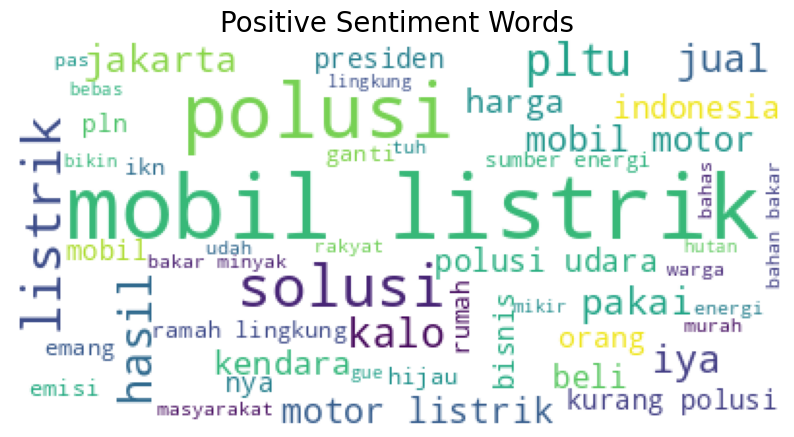

In [ ]:
wordcount_gen(df, 'Positive')

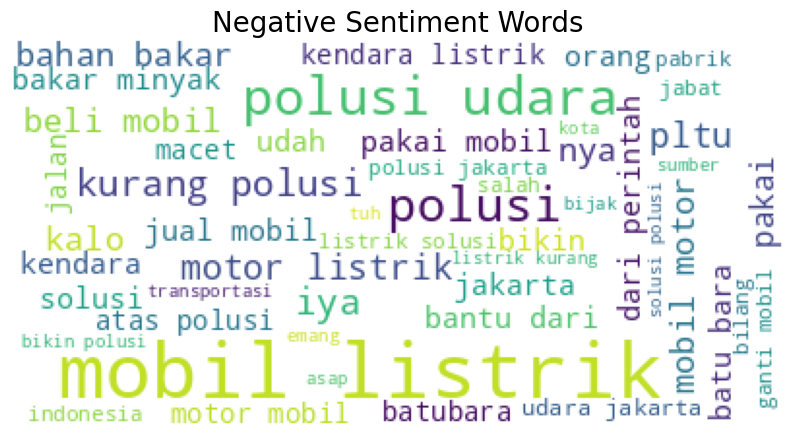

In [ ]:
wordcount_gen(df, 'Negative')

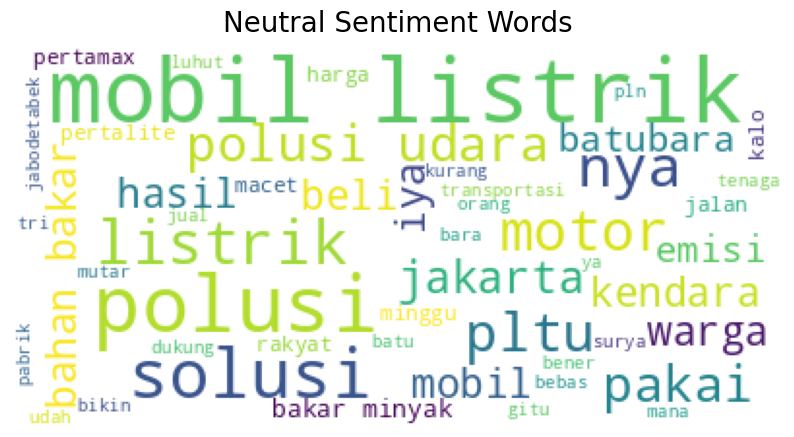

In [ ]:
wordcount_gen(df, 'Neutral')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Encode']= label_encoder.fit_transform(df['Label'])
df.head()

,text,Cleaning,HapusEmoji,3/Lebih,CaseFolding,Tokenizing,Formalisasi,Stopword Removal,Stemming,Clean,Score,Label,Encode
0,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,Anies mengatakan ini utk mengkritik kebijakan ...,anies mengatakan ini utk mengkritik kebijakan ...,"['anies', 'mengatakan', 'ini', 'utk', 'mengkri...","['anies', 'mengatakan', 'ini', 'untuk', 'mengk...","['anies', 'mengkritik', 'kebijakan', 'bantuan ...","['anies', 'kritik', 'bijak', 'bantu dari perin...",anies kritik bijak bantu dari perintah mobil l...,-11,Negative,0
1,"Pakai Mobil Listrik, PLN Buktikan Penghematan ...",Pakai Mobil Listrik PLN Buktikan Penghematan ...,Pakai Mobil Listrik PLN Buktikan Penghematan ...,Pakai Mobil Listrik PLN Buktikan Penghematan ...,pakai mobil listrik pln buktikan penghematan ...,"['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'buktikan...","['pakai', 'mobil', 'listrik', 'pln', 'bukti', ...",pakai mobil listrik pln bukti hemat persen rut...,0,Neutral,1
2,"*Gunakan Mobil Listrik, ternyata 85 Persen Leb...",*Gunakan Mobil Listrik ternyata Persen Lebi...,*Gunakan Mobil Listrik ternyata Persen Lebi...,*Gunakan Mobil Listrik ternyata Persen Lebih ...,*gunakan mobil listrik ternyata persen lebih ...,"['*', 'gunakan', 'mobil', 'listrik', 'ternyata...","['*', 'gunakan', 'mobil', 'listrik', 'ternyata...","['*', 'mobil', 'listrik', 'persen', 'hemat', '...","['', 'mobil', 'listrik', 'persen', 'hemat', 'l...",mobil listrik persen hemat lho electrizen sa...,5,Positive,2
3,"Polusi itu maslah di slrh Kota besar dunia, du...",Polusi itu maslah di slrh Kota besar dunia du...,Polusi itu maslah di slrh Kota besar dunia du...,Polusi itu maslah di slrh Kota besar dunia du...,polusi itu maslah di slrh kota besar dunia du...,"['polusi', 'itu', 'maslah', 'di', 'slrh', 'kot...","['polusi', 'itu', 'masalah', 'di', 'seluruh', ...","['polusi', 'kota', 'dunia', 'duniapun', 'menga...","['polusi', 'kota', 'dunia', 'dunia', 'atas', '...",polusi kota dunia dunia atas polusi udara tutu...,-24,Negative,0
4,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,Sedangkan Carbon Capture dan Storage mmg harus...,sedangkan carbon capture dan storage mmg harus...,"['sedangkan', 'carbon', 'capture', 'dan', 'sto...","['sedangkan', 'carbon', 'capture', 'dan', 'sto...","['carbon', 'capture', 'storage', 'topik', 'hot...","['carbon', 'capture', 'storage', 'topik', 'hot...",carbon capture storage topik hot kait polusi u...,-11,Negative,0


In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense



# Pilih kolom yang diperlukan
df = df[['Clean', 'Label']]

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(df['Clean'], df['Label'], test_size=0.2, random_state=42)

# Hitung pembobotan kelas
classes = sorted(y_train.unique())
class_weights = dict(zip(classes, compute_class_weight('balanced', classes=classes, y=y_train)))

# Gunakan TF-IDF untuk vektorisasi teks
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Gunakan model Naive Bayes dengan pembobotan kelas
nb_model = MultinomialNB(class_prior=[class_weights[label] for label in classes])
nb_model.fit(X_train_tfidf, y_train)

# Evaluasi model Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.24      0.39       174
     Neutral       0.03      0.80      0.05         5
    Positive       0.75      0.14      0.24        21

    accuracy                           0.24       200
   macro avg       0.58      0.39      0.23       200
weighted avg       0.93      0.24      0.36       200



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Sequence and pad
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)

# Create LSTM model with class weights
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM model with class weights
lstm_model.fit(X_train_seq, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_seq, y_test_encoded), class_weight=class_weights)

# Evaluate LSTM model
_, accuracy_lstm = lstm_model.evaluate(X_test_seq, y_test_encoded)
print(f"LSTM Accuracy: {accuracy_lstm}")


Epoch 1/10
13/13 [==============================] - 9s 114ms/step - loss: 0.5883 - accuracy: 0.0487 - val_loss: 1.1804 - val_accuracy: 0.0250
Epoch 2/10
13/13 [==============================] - 1s 61ms/step - loss: 0.0939 - accuracy: 0.0300 - val_loss: 3.2889 - val_accuracy: 0.0250
Epoch 3/10
13/13 [==============================] - 1s 64ms/step - loss: -5.3637e-04 - accuracy: 0.0300 - val_loss: 3.2212 - val_accuracy: 0.0250
Epoch 4/10
13/13 [==============================] - 1s 63ms/step - loss: -0.0303 - accuracy: 0.0300 - val_loss: 3.4896 - val_accuracy: 0.0250
Epoch 5/10
13/13 [==============================] - 1s 63ms/step - loss: -0.1013 - accuracy: 0.0300 - val_loss: 3.0538 - val_accuracy: 0.0250
Epoch 6/10
13/13 [==============================] - 1s 63ms/step - loss: -0.2752 - accuracy: 0.0300 - val_loss: 2.6374 - val_accuracy: 0.0250
Epoch 7/10
13/13 [==============================] - 1s 62ms/step - loss: -0.9294 - accuracy: 0.0362 - val_loss: 1.4099 - val_accuracy: 0.0450
Epo

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# SVM with class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate SVM model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.95      0.92       174
     Neutral       0.00      0.00      0.00         5
    Positive       0.55      0.29      0.37        21

    accuracy                           0.86       200
   macro avg       0.48      0.41      0.43       200
weighted avg       0.84      0.86      0.84       200

